**Judul  : Sentimen Analisis Review APK Shopee di Play Store**

**Nama : Azhar Zuhro**

**Daerah  : Tuban**

# **Sentimen Analisis Review APK Shopee di Play Store**
Selamat datang dalam proyek Sentimen Analisis Review APK Play Store ini! Dalam era digital yang berkembang pesat ini, ulasan pengguna memiliki peran penting dalam membentuk persepsi terhadap aplikasi mobile. Dalam proyek ini, kita akan menjelajahi dunia analisis sentimen untuk memahami bagaimana orang merasakan dan mengungkapkan pendapat mereka tentang aplikasi di Google Play Store, khususnya aplikasi Shopee.

Analisis sentimen adalah salah satu cabang penting dalam pemrosesan bahasa alami yang memungkinkan kita untuk secara otomatis mengidentifikasi apakah ulasan pengguna cenderung positif, negatif, atau netral. Dengan demikian, proyek ini akan membantu kita dalam memahami umpan balik pengguna dengan lebih baik, dan dapat digunakan untuk mengambil keputusan yang lebih baik dalam pengembangan dan perbaikan aplikasi.

Kode di samping menunjukkan langkah-langkah yang terlibat dalam analisis sentimen, mulai dari scraping ulasan aplikasi Shopee, preprocessing teks, hingga visualisasi hasil analisis. Pustaka seperti google-play-scraper, sastrawi, nltk, dan wordcloud digunakan untuk melakukan tugas-tugas ini.

Tentunya, proyek ini akan memberi Anda wawasan yang berharga dalam analisis sentimen dan keterampilan pemrograman yang relevan. Mari kita mulai memahami bagaimana kita dapat mengungkap sentimen di balik ulasan pengguna di Play Store!

# **Install Library**

In [1]:
# Install library yang dibutuhkan
!pip install google-play-scraper
!pip install sastrawi
!pip install nltk
!pip install wordcloud

# **Import Library**

In [2]:
# Import library
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
import csv
from io import StringIO

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from google_play_scraper import app, reviews, Sort, reviews_all
import nltk

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Bidirectional, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import joblib  # Untuk menyimpan model
from scipy.stats import uniform

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Scapping Dataset

Pada proyek ini, kita akan melakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait aplikasi Shopee di Play Store. Analisis sentimen akan membantu kita untuk memahami bagaimana pengguna merasakan dan mengungkapkan pandangan mereka terhadap aplikasi ini.

Dengan menggunakan berbagai teknik pemrosesan teks dan algoritma machine learning, kita akan mencoba mengidentifikasi apakah ulasan pengguna terhadap aplikasi Shopee cenderung positif, negatif, atau netral. Hasil analisis sentimen ini dapat memberikan wawasan berharga kepada pengembang aplikasi untuk meningkatkan pengalaman pengguna.

Mari kita mulai menjelajahi ulasan pengguna dan menganalisis sentimen di sekitar aplikasi Shopee dengan lebih mendalam!

In [3]:
# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.shopee.id',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=10000           # Jumlah maksimum ulasan yang ingin diambil
)

In [4]:
# Menyimpan ulasan dalam file CSV
with open('ulasan_shoope.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# Loading Dataset

In [5]:
# --- Loading Dataset ---
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.to_csv('ulasan_shoope.csv', index=False)
clean_df = app_reviews_df.dropna()
clean_df = clean_df.drop_duplicates()

In [6]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [7]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bb582a94-9844-40aa-8c97-506e07c22fb7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jujur pake Shopee ini baguss banget sebenernya...,2,74,3.42.24,2025-01-21 13:19:08,"Hai kak, mohon maaf atas ketidaknyamanan nya. ...",2025-01-21 14:18:24,3.42.24
1,d8474dc1-da09-4605-9aab-de73f1d61dbe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Terus terang saya suka sekali belanja di shope...,3,43,3.42.24,2025-01-20 22:13:42,None,NaT,3.42.24
2,63dbc9c4-2da7-4825-b335-2a5a1e1575de,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya bagus, mudah dipahami. Seeing bela...",5,465,3.42.24,2025-01-20 02:29:58,"Hi kak, maaf ya udh buat kamu ga nyaman. Terka...",2023-02-07 09:24:08,3.42.24
3,6fb0e5ed-6cb7-4a58-918a-df6ff6d44023,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,1. Pesanan cod roksaya dibatalkan sendiri oleh...,3,20,3.42.24,2025-01-21 09:15:14,"Hii kak, terima kasih banyak ya kak atas ratin...",2023-12-13 03:14:36,3.42.24
4,e672ab98-c5a4-438f-aebd-3a227683fad0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi elit benerin bug shopeepay sulit, tia...",2,11,3.42.24,2025-01-21 17:57:31,"Hai kak, maaf yaw udah buat ga nyaman, terkait...",2025-01-21 18:34:39,3.42.24


In [8]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85500 entries, 0 to 85499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              85500 non-null  object        
 1   userName              85500 non-null  object        
 2   userImage             85500 non-null  object        
 3   content               85500 non-null  object        
 4   score                 85500 non-null  int64         
 5   thumbsUpCount         85500 non-null  int64         
 6   reviewCreatedVersion  73582 non-null  object        
 7   at                    85500 non-null  datetime64[ns]
 8   replyContent          64323 non-null  object        
 9   repliedAt             64323 non-null  datetime64[ns]
 10  appVersion            73582 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 7.2+ MB


In [9]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56523 entries, 0 to 85499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              56523 non-null  object        
 1   userName              56523 non-null  object        
 2   userImage             56523 non-null  object        
 3   content               56523 non-null  object        
 4   score                 56523 non-null  int64         
 5   thumbsUpCount         56523 non-null  int64         
 6   reviewCreatedVersion  56523 non-null  object        
 7   at                    56523 non-null  datetime64[ns]
 8   replyContent          56523 non-null  object        
 9   repliedAt             56523 non-null  datetime64[ns]
 10  appVersion            56523 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 5.2+ MB


In [10]:
clean_df.shape

(56523, 11)

##Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [11]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Kamus slang atau daftar kata-kata slang yang Anda berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [13]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [14]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,bb582a94-9844-40aa-8c97-506e07c22fb7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jujur pake Shopee ini baguss banget sebenernya...,2,74,3.42.24,2025-01-21 13:19:08,"Hai kak, mohon maaf atas ketidaknyamanan nya. ...",2025-01-21 14:18:24,3.42.24,Jujur pake Shopee ini baguss banget sebenernya...,jujur pake shopee ini baguss banget sebenernya...,jujur pakai shopee ini baguss banget sebenerny...,"[jujur, pakai, shopee, ini, baguss, banget, se...","[jujur, pakai, shopee, baguss, banget, sebener...",jujur pakai shopee baguss banget sebenernya be...
2,63dbc9c4-2da7-4825-b335-2a5a1e1575de,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya bagus, mudah dipahami. Seeing bela...",5,465,3.42.24,2025-01-20 02:29:58,"Hi kak, maaf ya udh buat kamu ga nyaman. Terka...",2023-02-07 09:24:08,3.42.24,Aplikasinya bagus mudah dipahami Seeing belanj...,aplikasinya bagus mudah dipahami seeing belanj...,aplikasinya bagus mudah dipahami seeing belanj...,"[aplikasinya, bagus, mudah, dipahami, seeing, ...","[aplikasinya, bagus, mudah, dipahami, seeing, ...",aplikasinya bagus mudah dipahami seeing belanj...
3,6fb0e5ed-6cb7-4a58-918a-df6ff6d44023,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,1. Pesanan cod roksaya dibatalkan sendiri oleh...,3,20,3.42.24,2025-01-21 09:15:14,"Hii kak, terima kasih banyak ya kak atas ratin...",2023-12-13 03:14:36,3.42.24,Pesanan cod roksaya dibatalkan sendiri oleh si...,pesanan cod roksaya dibatalkan sendiri oleh si...,pesanan bayar ditempat roksaya dibatalkan send...,"[pesanan, bayar, ditempat, roksaya, dibatalkan...","[pesanan, bayar, ditempat, roksaya, dibatalkan...",pesanan bayar ditempat roksaya dibatalkan sist...
4,e672ab98-c5a4-438f-aebd-3a227683fad0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi elit benerin bug shopeepay sulit, tia...",2,11,3.42.24,2025-01-21 17:57:31,"Hai kak, maaf yaw udah buat ga nyaman, terkait...",2025-01-21 18:34:39,3.42.24,Aplikasi elit benerin bug shopeepay sulit tiap...,aplikasi elit benerin bug shopeepay sulit tiap...,aplikasi elit benerin bug shopeepay sulit tiap...,"[aplikasi, elit, benerin, bug, shopeepay, suli...","[aplikasi, elit, benerin, bug, shopeepay, suli...",aplikasi elit benerin bug shopeepay sulit upda...
5,f94c0cf3-2ae8-4323-972f-24f150d289a8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Selalu pake aplikasi ini setiap belanja online...,4,11,3.42.24,2025-01-21 03:35:02,Hi kak Kiki Mandasari sebelumnya maaf ya udah ...,2025-01-21 04:39:53,3.42.24,Selalu pake aplikasi ini setiap belanja online...,selalu pake aplikasi ini setiap belanja online...,selalu pakai aplikasi ini setiap belanja onlin...,"[selalu, pakai, aplikasi, ini, setiap, belanja...","[pakai, aplikasi, belanja, online, suka, bange...",pakai aplikasi belanja online suka banget mura...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85484,efcd9a04-5441-4f48-9b98-c60c49a287e8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Shope hanya berpihak pada penjual Saya beli du...,2,0,2.58.12,2020-07-22 11:00:54,Maaf banget yaa kak jadi ga nyaman. Kalo kamu ...,2020-07-22 13:24:36,2.58.12,Shope hanya berpihak pada penjual Saya beli du...,shope hanya berpihak pada penjual saya beli du...,shope hanya berpihak pada penjual saya beli du...,"[shope, hanya, berpihak, pada, penjual, saya, ...","[shope, berpihak, penjual, beli, sendal, dikir...",shope berpihak penjual beli sendal dikirim dui...
85485,eca8822d-5a53-45ed-9f85-5967ee63ea4e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ahir ahir ini kok lemot baget ya kak gambarnya...,3,0,2.52.10,2020-03-20 08:07:35,"Hi Kak, wah maaf banget ya kak bikin ga nyaman...",2020-03-20 09:29:17,2.52.10,Ahir ahir ini

##Pelabelan

In [15]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [16]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [17]:
# Terapkan analisis sentimen pada kolom 'text_stopword' dari DataFrame
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

# Pisahkan hasil analisis ke dalam daftar terpisah untuk skor dan polaritas
results = list(zip(*results))

# Tambahkan hasil analisis ke kolom baru dalam DataFrame
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())


polarity
positive    27767
negative    24615
neutral      4141
Name: count, dtype: int64


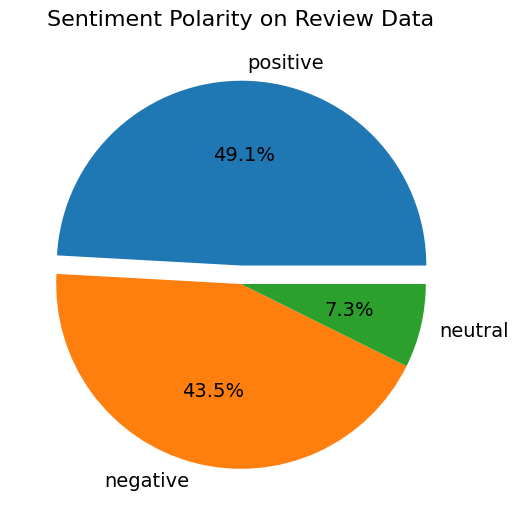

In [18]:
# Tentukan label yang diinginkan
labels = ['positive', 'negative', 'neutral']

# Dapatkan jumlah untuk setiap sentimen
sizes = [clean_df['polarity'].value_counts().get(label, 0) for label in labels]

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0)  # Explode the first slice (positive)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [19]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [20]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [21]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas neutral.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'neutral_tweets' berdasarkan 'polarity_score' (bisa ascending atau descending).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True) # or ascending=False

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_tweets = neutral_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

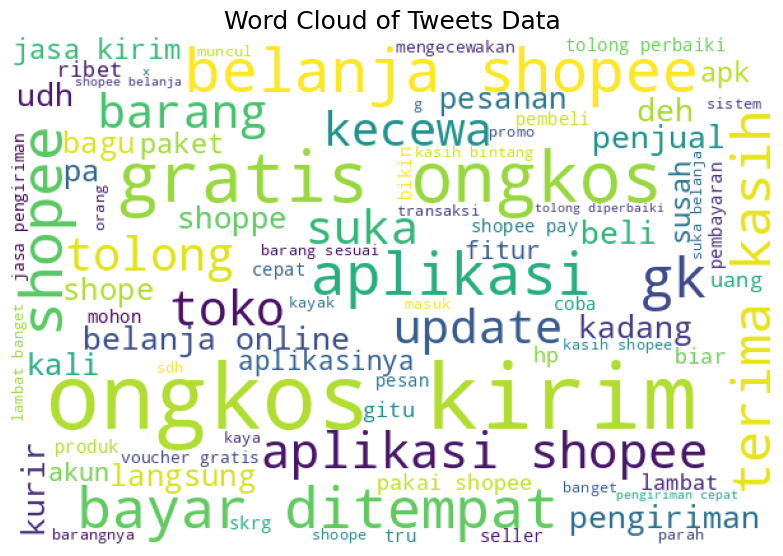

In [22]:
# Membuat list kosong untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = []

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Menambahkan semua kata dalam tweet ke dalam list.
    list_words.extend(tweet)

# Menggabungkan semua kata dalam 'list_words' menjadi satu string.
list_words_str = ' '.join(list_words)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words_str)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow(wordcloud)

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()


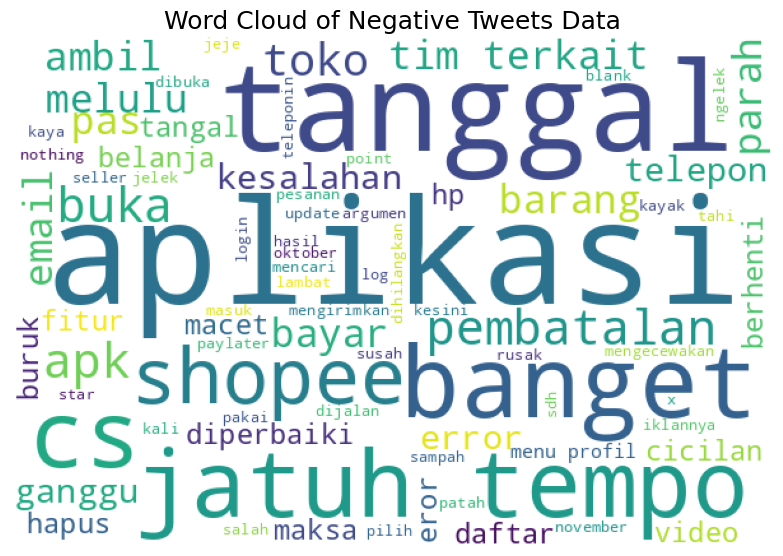

In [23]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

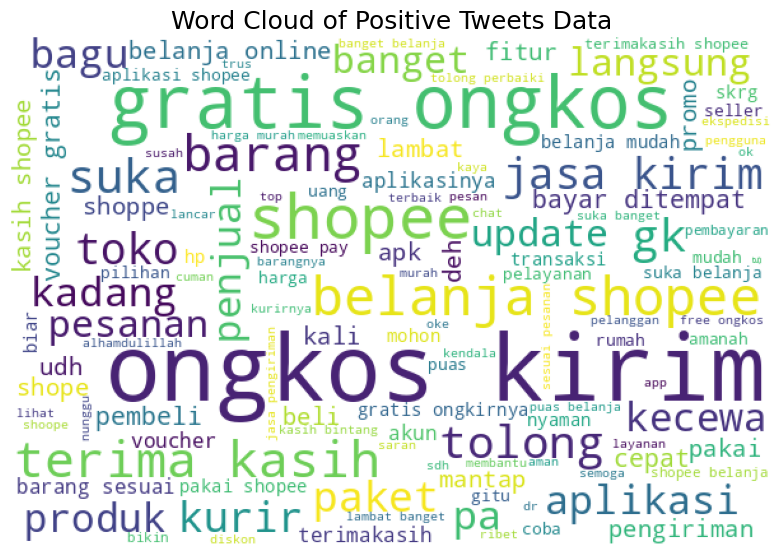

In [24]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

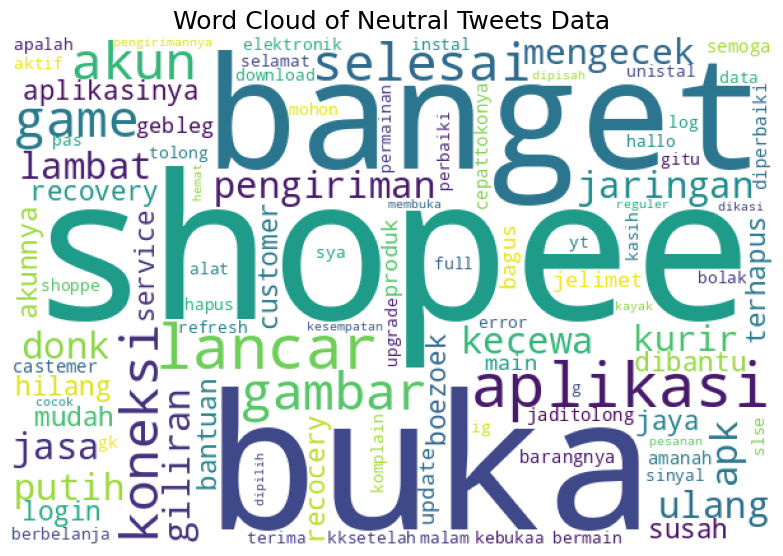

In [25]:
# Membuat string kosong 'list_words' untuk mengumpulkan semua kata dari teks
# yang sudah dibersihkan dalam tweet neutral.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

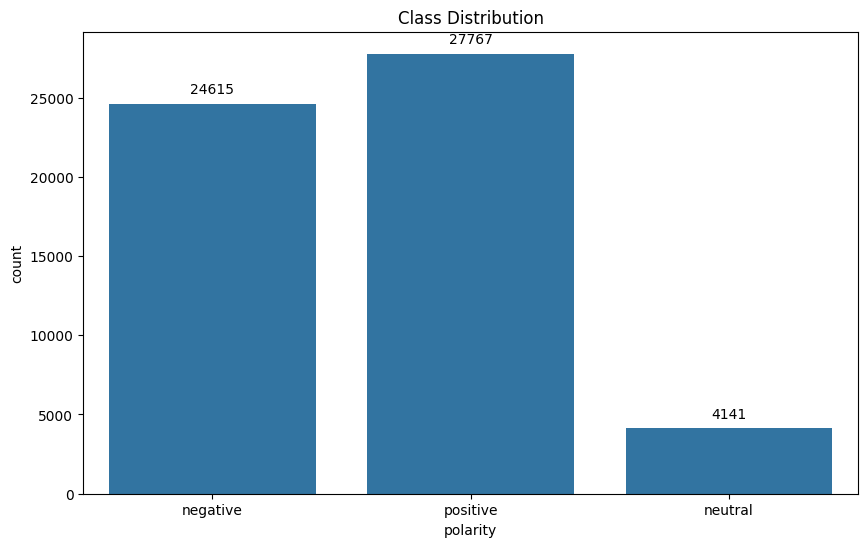

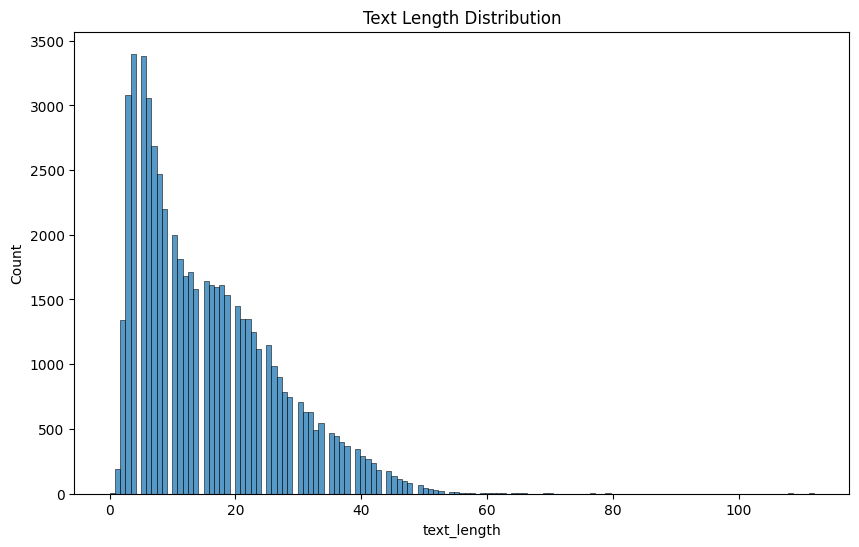

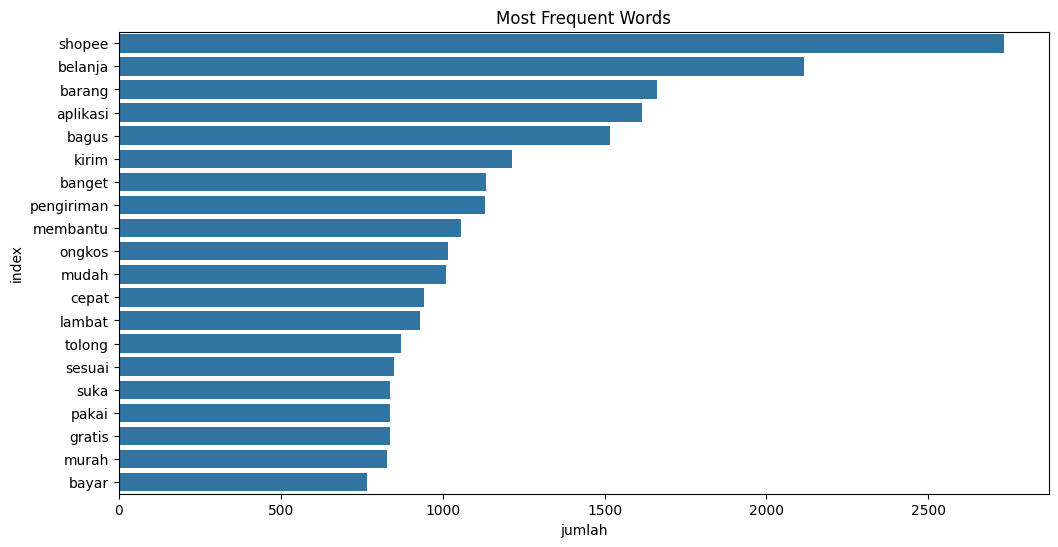

In [26]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

## **Data Splitting**

In [27]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,bb582a94-9844-40aa-8c97-506e07c22fb7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Jujur pake Shopee ini baguss banget sebenernya. berkali kali oleng ke aplikasi lain tapii akhirnya yaaa co ke Shopee. Namun yang sangat disayangkan adalah aplikasi ini benar benar ngelag PARAH. mau ngetik di live pun nggak bisa. Harus tutup aplikasi dulu, baru masuk lagi.",2,74,3.42.24,2025-01-21 13:19:08,"Hai kak, mohon maaf atas ketidaknyamanan nya. terkait feedback dri kakak akan dijadikan evaluasi agar pelayanan dan juga performa aplikasi Shopee semakin lebih baik lagi ke depan nya. Kalau ada kendala terkait Shopee kakak bisa DM IG aku di @Shopee_id ya kak . Sehat selalu ^QR",2025-01-21 14:18:24,3.42.24,Jujur pake Shopee ini baguss banget sebenernya berkali kali oleng ke aplikasi lain tapii akhirnya yaaa co ke Shopee Namun yang sangat disayangkan adalah aplikasi ini benar benar ngelag PARAH mau ngetik di live pun nggak bisa Harus tutup aplikasi dulu baru masuk lagi,jujur pake shopee ini baguss banget sebenernya berkali kali oleng ke aplikasi lain tapii akhirnya yaaa co ke shopee namun yang sangat disayangkan adalah aplikasi ini benar benar ngelag parah mau ngetik di live pun nggak bisa harus tutup aplikasi dulu baru masuk lagi,jujur pakai shopee ini baguss banget sebenernya berkali kali oleng ke aplikasi lain tapii akhirnya yaaa co ke shopee namun yang sangat disayangkan adalah aplikasi ini benar benar ngelag parah mau ngetik di live pun tidak bisa harus tutup aplikasi dulu baru masuk lagi,"[jujur, pakai, shopee, ini, baguss, banget, sebenernya, berkali, kali, oleng, ke, aplikasi, lain, tapii, akhirnya, yaaa, co, ke, shopee, namun, yang, sangat, disayangkan, adalah, aplikasi, ini, benar, benar, ngelag, parah, mau, ngetik, di, live, pun, tidak, bisa, harus, tutup, aplikasi, dulu, baru, masuk, lagi]","[jujur, pakai, shopee, baguss, banget, sebenernya, berkali, kali, oleng, aplikasi, tapii, yaaa, co, shopee, disayangkan, aplikasi, ngelag, parah, ngetik, live, tutup, aplikasi, masuk]",jujur pakai shopee baguss banget sebenernya berkali kali oleng aplikasi tapii yaaa co shopee disayangkan aplikasi ngelag parah ngetik live tutup aplikasi masuk,-15,negative,23
2,63dbc9c4-2da7-4825-b335-2a5a1e1575de,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasinya bagus, mudah dipahami. Seeing belanja di Shopee karena banyak voucher dan gratis ongkir. Lebih suka dan lebih enak belanja lewat Shopee, pembayaran mudah, pengiriman cepat. Respon cs makin kesini juga makin bagus. Kalau ada kendala atau permasalahan terkait barang yang dipesan, permasalahannya cepet terselesaikan",5,465,3.42.24,2025-01-20 02:29:58,"Hi kak, maaf ya udh buat kamu ga nyaman. Terkait kendala kamu mengenai pengembalian barang dan dana. Mimin bantu infoin, mohon kesediaannya untuk menunggu informasi dari tim mediasi Shopee, kamu bisa selalui aktif pada forum diskusi ya kak. Agar bs aku bantu cek, boleh diinfoin utk nomor pesanannya melalui Live Chat. Stay safe🙏🏻^SI",2023-02-07 09:24:08,3.42.24,Aplikasinya bagus mudah dipahami Seeing belanja di Shopee karena banyak voucher dan gratis ongkir Lebih suka dan lebih enak belanja lewat Shopee pembayaran mudah pengiriman cepat Respon cs makin kesini juga makin bagus Kalau ada kendala atau permasalahan terkait barang yang dipesan permasalahannya cepet terselesaikan,aplikasinya bagus mudah dipahami seeing belanja di shopee karena banyak voucher dan gratis ongkir lebih suka dan lebih enak belanja lewat shopee pembayaran mudah pengiriman cepat respon cs makin kesini juga makin bagus kalau ada kendala atau permasalahan terkait 

In [28]:
# Asumsikan clean_df sudah didefinisikan sebelumnya
X = clean_df['text_akhir'].values
y = pd.get_dummies(clean_df['polarity']).values

# Tokenisasi dan Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Bagi Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42
)

## **Pelatihan LSTM**

In [29]:
# Bangun Model LSTM
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))  # Layer LSTM pertama
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))  # Layer LSTM kedua
model.add(Dense(64, activation='relu'))  # Layer Dense
model.add(Dropout(0.5))  # Dropout untuk mengurangi overfitting
model.add(BatchNormalization())  # Normalisasi batch
model.add(Dense(3, activation='softmax'))  # Layer output

# Kompilasi Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Definisikan Callback untuk mencapai akurasi dan val_accuracy minimal 92%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

# Latih Model dengan Callback
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[callbacks]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


707/707 ━━━━━━━━━━━━━━━━━━━━ 341s 471ms/step - accuracy: 0.7198 - loss: 0.6559 - val_accuracy: 0.8829 - val_loss: 0.3304
Epoch 2/50
707/707 ━━━━━━━━━━━━━━━━━━━━ 375s 461ms/step - accuracy: 0.8938 - loss: 0.2939 - val_accuracy: 0.8974 - val_loss: 0.2835
Epoch 3/50
707/707 ━━━━━━━━━━━━━━━━━━━━ 387s 468ms/step - accuracy: 0.9179 - loss: 0.2229 - val_accuracy: 0.9156 - val_loss: 0.2411
Epoch 4/50
707/707 ━━━━━━━━━━━━━━━━━━━━ 323s 457ms/step - accuracy: 0.9300 - loss: 0.1975 - val_accuracy: 0.9097 - val_loss: 0.2809
Epoch 5/50
707/707 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9397 - loss: 0.1686
Akurasi telah mencapai >92%!
707/707 ━━━━━━━━━━━━━━━━━━━━ 382s 457ms/step - accuracy: 0.9397 - loss: 0.1686 - val_accuracy: 0.9218 - val_loss: 0.2432


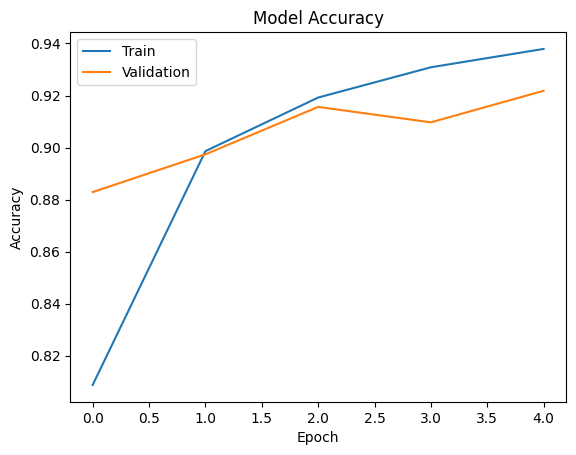

In [30]:
# Plot akurasi model selama proses pelatihan
plt.plot(history.history['accuracy'])  # Plot akurasi pada data pelatihan
plt.plot(history.history['val_accuracy'])  # Plot akurasi pada data validasi

# Menambahkan judul grafik
plt.title('Model Accuracy')

# Menambahkan label pada sumbu Y (akurasi)
plt.ylabel('Accuracy')

# Menambahkan label pada sumbu X (epoch)
plt.xlabel('Epoch')

# Menambahkan legenda untuk membedakan antara data pelatihan dan validasi
plt.legend(['Train', 'Validation'], loc='upper left')

# Menampilkan grafik
plt.show()

## **Pelatihan Bi-LSTM**

In [31]:
# Bangun Model Bi-LSTM
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))  # Layer Embedding
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))  # Bi-LSTM pertama
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))  # Bi-LSTM kedua
model.add(Dense(64, activation='relu'))  # Layer Dense
model.add(Dropout(0.5))  # Dropout untuk mengurangi overfitting
model.add(BatchNormalization())  # Normalisasi batch
model.add(Dense(3, activation='softmax'))  # Layer output

# Kompilasi Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks: EarlyStopping dan ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Latih Model dengan Callbacks
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/5
707/707 ━━━━━━━━━━━━━━━━━━━━ 678s 943ms/step - accuracy: 0.7219 - loss: 0.6529 - val_accuracy: 0.8905 - val_loss: 0.2980 - learning_rate: 0.0010
Epoch 2/5
707/707 ━━━━━━━━━━━━━━━━━━━━ 699s 989ms/step - accuracy: 0.8987 - loss: 0.2788 - val_accuracy: 0.9042 - val_loss: 0.2703 - learning_rate: 0.0010
Epoch 3/5
707/707 ━━━━━━━━━━━━━━━━━━━━ 747s 996ms/step - accuracy: 0.9209 - loss: 0.2217 - val_accuracy: 0.9121 - val_loss: 0.2469 - learning_rate: 0.0010
Epoch 4/5
707/707 ━━━━━━━━━━━━━━━━━━━━ 711s 951ms/step - accuracy: 0.9360 - loss: 0.1826 - val_accuracy: 0.9170 - val_loss: 0.2481 - learning_rate: 0.0010
Epoch 5/5
707/707 ━━━━━━━━━━━━━━━━━━━━ 716s 1s/step - accuracy: 0.9408 - loss: 0.1646 - val_accuracy: 0.9192 - val_loss: 0.2387 - learning_rate: 0.0010


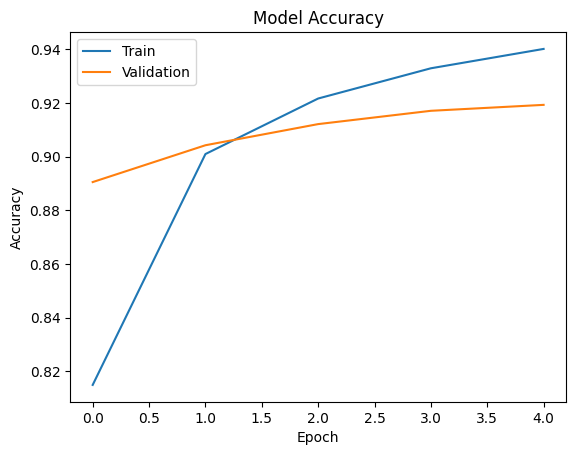

In [32]:
# Plot akurasi model selama proses pelatihan
plt.plot(history.history['accuracy'])  # Plot akurasi pada data pelatihan
plt.plot(history.history['val_accuracy'])  # Plot akurasi pada data validasi

# Menambahkan judul grafik
plt.title('Model Accuracy')

# Menambahkan label pada sumbu Y (akurasi)
plt.ylabel('Accuracy')

# Menambahkan label pada sumbu X (epoch)
plt.xlabel('Epoch')

# Menambahkan legenda untuk membedakan antara data pelatihan dan validasi
plt.legend(['Train', 'Validation'], loc='upper left')

# Menampilkan grafik
plt.show()

# Pelatihan DNN

In [33]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Ambil maksimal 5000 fitur
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Bagi Data Latih dan Validasi
X_train_tfidf, X_validation_tfidf, y_train, y_validation = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# Bangun Model Neural Network
model = Sequential()
model.add(Dense(512, input_dim=X_train_tfidf.shape[1], activation='relu'))  # Layer Dense pertama
model.add(Dropout(0.5))  # Dropout untuk mengurangi overfitting
model.add(Dense(256, activation='relu'))  # Layer Dense kedua
model.add(Dropout(0.5))  # Dropout lagi
model.add(Dense(128, activation='relu'))  # Layer Dense tambahan
model.add(Dropout(0.5))  # Dropout untuk layer tambahan
model.add(Dense(3, activation='softmax'))  # Output layer

# Kompilasi Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Latih Model
history = model.fit(
    X_train_tfidf.toarray(),
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_validation_tfidf.toarray(), y_validation),
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.7393 - loss: 0.5920 - val_accuracy: 0.8963 - val_loss: 0.2749
Epoch 2/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.9162 - loss: 0.2236 - val_accuracy: 0.9093 - val_loss: 0.2479
Epoch 3/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9454 - loss: 0.1508 - val_accuracy: 0.9069 - val_loss: 0.2514
Epoch 4/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9645 - loss: 0.1036 - val_accuracy: 0.9096 - val_loss: 0.2690
Epoch 5/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9742 - loss: 0.0769 - val_accuracy: 0.9053 - val_loss: 0.3164
Epoch 6/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.9800 - loss: 0.0590 - val_accuracy: 0.9112 - val_loss: 0.3092
Epoch 7/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9873 - loss: 0.0411 - val_accuracy: 0.9033 - val_loss: 0.3391
Epoch 8/10
707/707 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9895 - loss: 0.0339 - 

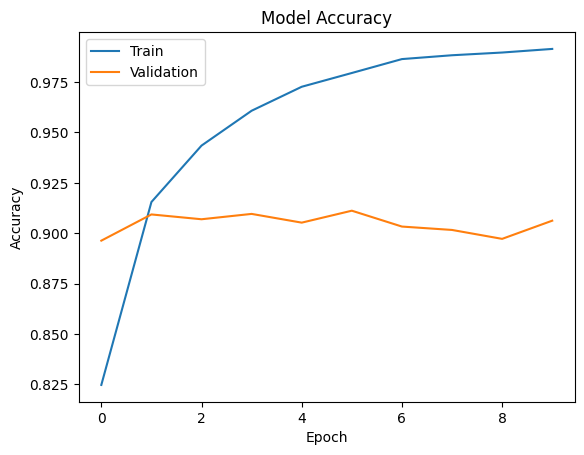

In [34]:
# Plot akurasi model selama proses pelatihan
plt.plot(history.history['accuracy'])  # Plot akurasi pada data pelatihan
plt.plot(history.history['val_accuracy'])  # Plot akurasi pada data validasi

# Menambahkan judul grafik
plt.title('Model Accuracy')

# Menambahkan label pada sumbu Y (akurasi)
plt.ylabel('Accuracy')

# Menambahkan label pada sumbu X (epoch)
plt.xlabel('Epoch')

# Menambahkan legenda untuk membedakan antara data pelatihan dan validasi
plt.legend(['Train', 'Validation'], loc='upper left')

# Menampilkan grafik
plt.show()

## **Pelatihan Logistic Regression**

In [46]:
# Ekstraksi fitur dengan TF-IDF (gunakan max_features yang lebih rendah untuk mempercepat)
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.85)
X_tfidf = tfidf.fit_transform(X)

# simpan tfidf
joblib.dump(tfidf, 'tfidf.pkl')
print("TfidfVectorizer saved as 'tfidf.pkl'")

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Jika y dalam bentuk one-hot encoding, ubah ke bentuk 1D
if len(y.shape) > 1:
    y_train = y_train.argmax(axis=1)
    y_test = y_test.argmax(axis=1)

param_dist = {
    'C': uniform(0.01, 10),  # Rentang nilai C secara acak
    'solver': ['liblinear', 'saga'],  # Solver yang berbeda
    'max_iter': [100, 1000]  # Jumlah iterasi
}

# Menerapkan RandomizedSearchCV
randomized_search = RandomizedSearchCV(LogisticRegression(), param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Melatih model dengan RandomizedSearchCV
randomized_search.fit(X_train.toarray(), y_train)

# Mencetak parameter terbaik dari RandomizedSearchCV
print("Best Parameters from RandomizedSearch:", randomized_search.best_params_)

# Menggunakan parameter terbaik dari RandomizedSearchCV
best_model_randomized = randomized_search.best_estimator_

# Simpan model terbaik ke dalam file
joblib.dump(best_model_randomized, 'best_logistic_model.pkl')
print("Model saved as 'best_logistic_model.pkl'")

# Prediksi sentimen pada data pelatihan dan data uji menggunakan RandomizedSearchCV
y_pred_train_lr_randomized = best_model_randomized.predict(X_train.toarray())
y_pred_test_lr_randomized = best_model_randomized.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression dengan RandomizedSearchCV
accuracy_train_lr_randomized = accuracy_score(y_pred_train_lr_randomized, y_train)
accuracy_test_lr_randomized = accuracy_score(y_pred_test_lr_randomized, y_test)

# Menampilkan akurasi
print('RandomizedSearchCV - accuracy_train:', accuracy_train_lr_randomized)
print('RandomizedSearchCV - accuracy_test:', accuracy_test_lr_randomized)

TfidfVectorizer saved as 'tfidf.pkl'
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from RandomizedSearch: {'C': 8.334426408004218, 'max_iter': 1000, 'solver': 'saga'}
Model saved as 'best_logistic_model.pkl'
RandomizedSearchCV - accuracy_train: 0.9390132942425314
RandomizedSearchCV - accuracy_test: 0.9094179394940143


In [42]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = best_model_randomized.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: barang jelek gk sesui dengan gambar
Sentimen kalimat baru adalah NEGATIF.
